<div class="pull-right">
    made by
    <a href=https://github.com/sergeimars title=sergeimars>sergeimars</a>
</div>

# Исследование надежности заемщиков


**Цель:** Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок.

**Входные данные от банка:** статистика о платёжеспособности клиентов.
  
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Ключевые вопросы исследования:**
  
- Есть ли зависимость между количеством детей и возвратом кредита в срок?
- Есть ли зависимость между семейным положением и возвратом кредита в срок?
- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
- Как разные цели кредита влияют на его возврат в срок?
  
**План работы:**
- изучить данные;
- предобработка и категоризация;
- проверка гипотез, вытекающих из основных вопросов исследования;
- выводы по результатам исследования.

## Откроем таблицу и изучим общую информацию о данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

try:
    data = pd.read_csv('data.csv')
except:
    print('Не получилось, нужно проверить адрес')
else:
    print('Данные загружены успешно!')

Данные загружены успешно!


Выведем первые 20 строчек датафрейма `data` на экран.

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Выведем основную информацию о датафрейме с помощью метода `info()`.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Итак, имеем датафрейм из 12 колонок и более 21,5 строк с информацией о клиентах, в том числе количество детей, стаж, дата рождения, образование, семейный статус, пол, вид дохода, задолженность, сумма дохода и цель привлечения кредита

## Предобработка данных

### Удаление пропусков

Выведем количество пропущенных значений для каждого столбца.

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

В двух столбцах есть пропущенные значения. Один из них — `days_employed`.  
Пропуски в этом столбце мы обработаем на следующем этапе.
  
Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`.

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

Обработаем значения в столбце `days_employed`: заменим все отрицательные значения положительными с помощью метода `abs()`.

In [6]:
data['days_employed'] = data['days_employed'].abs()

Для каждого типа занятости выведем медианное значение трудового стажа `days_employed` в днях.

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставим их как есть.

Выведием перечень уникальных значений столбца `children`.

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

В столбце `children` есть два аномальных значения. Удалим строки, в которых встречаются такие аномальные значения из датафрейма `data`.

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

Ещё раз выведем перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

Заполним пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

Убедимся, что все пропуски заполнены. Проверим себя и ещё раз выведем количество пропущенных значений для каждого столбца.

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

Заменим вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

Обработаем неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному:   
с использованием заглавных и строчных букв. Приведем их к нижнему регистру.

In [14]:
data['education'] = data['education'].str.lower()

Выведем на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалим их.

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

На основании диапазонов, указанных ниже, создадим в датафрейме `data` столбец `total_income_category` с категориями:

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

Выведем на экран перечень уникальных целей взятия кредита из столбца `purpose`.

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Исследуем данные

#### Есть ли зависимость между количеством детей и возвратом кредита в срок?

Создадим функцию, которая формирует сводную таблицу со столбцами 'Кол-во клиентов', 'Кол-во должников', 'Доля невозврата'.  
В строки выведем необходимый показатель для анализа зависимости.

,Кол-во клиентов,Кол-во должников,Доля невозврата
children,,,
4,41,4,0.097561
2,2052,194,0.094542
1,4808,444,0.092346
3,330,27,0.081818
0,14091,1063,0.075438
5,9,0,0.000000


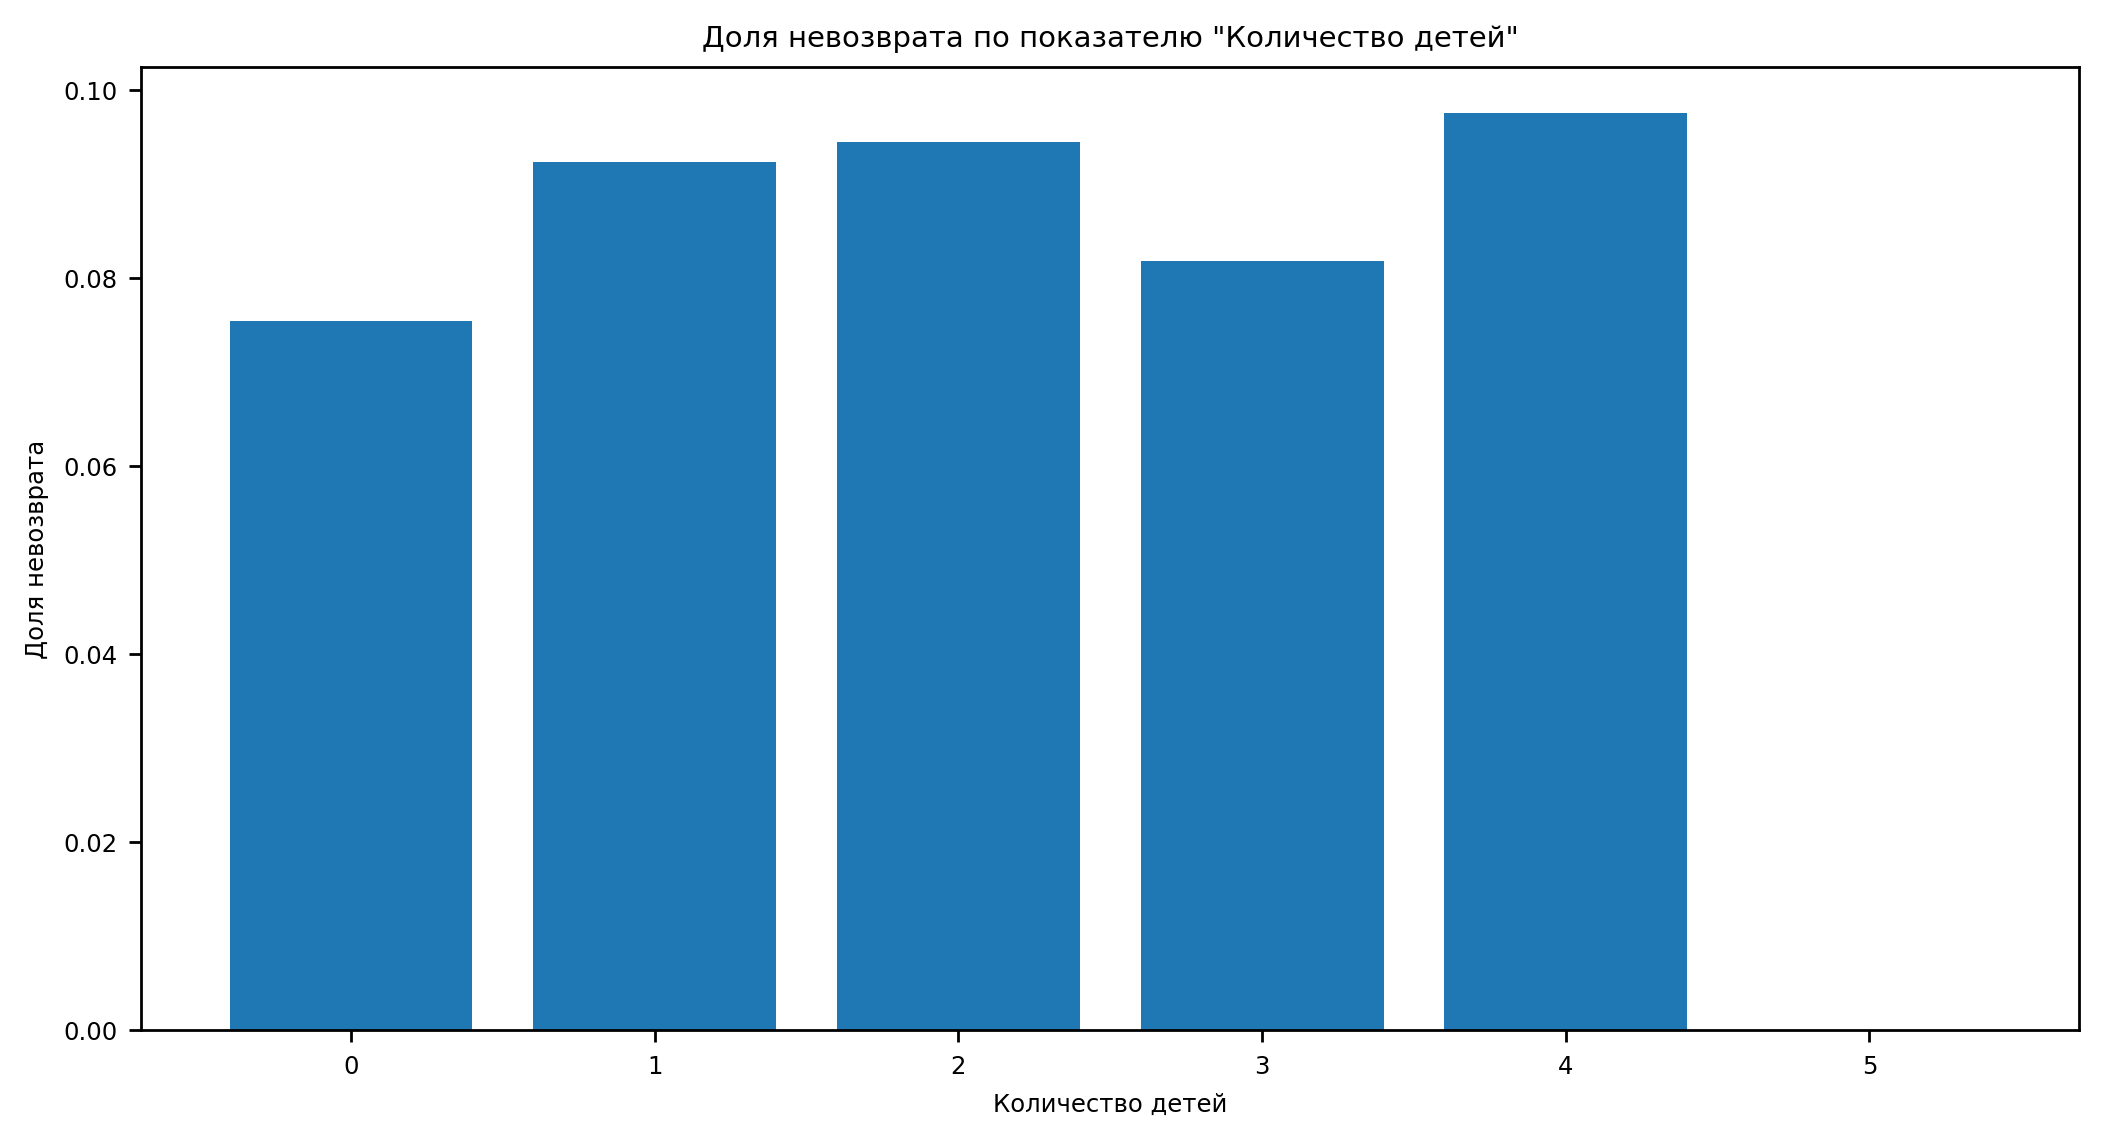

In [22]:
def data_pivot(data, index, name):
    data_pivot = data.pivot_table(index = index, values = 'debt', aggfunc = ['count','sum','mean'])
    data_pivot.columns = ['Кол-во клиентов', 'Кол-во должников', 'Доля невозврата']
    display (data_pivot.sort_values('Доля невозврата', ascending = False))
    plt.figure(figsize=(10, 5), dpi=250)
    mpl.rcParams.update({'font.size': 7})
    plt.bar(data_pivot.index, data_pivot['Доля невозврата'])
    plt.title('Доля невозврата по показателю "{}"'.format(name))
    plt.xlabel(name)
    plt.ylabel("Доля невозврата")
    plt.show()

# Выведем долю невозврата по количеству детей.
data_pivot(data, 'children', 'Количество детей')

**Вывод:**
  
Для предотвращения искажения выводов мы учли распределение выборки по категориям. 
Данные свидетельствуют о том, что семьи без детей показывают наилучшую финансовую дисциплину, при этом, необходимо отметить, что данных по многодетным семьям (3 и более детей) недостаточно для определения зависимости, в связи с чем требуется анализ более репрезентативной выборки по данным категориям.

#### Есть ли зависимость между семейным положением и возвратом кредита в срок?

,Кол-во клиентов,Кол-во должников,Доля невозврата
family_status,,,
Не женат / не замужем,2796,273,0.097639
гражданский брак,4134,385,0.093130
женат / замужем,12261,927,0.075606
в разводе,1189,84,0.070648
вдовец / вдова,951,63,0.066246


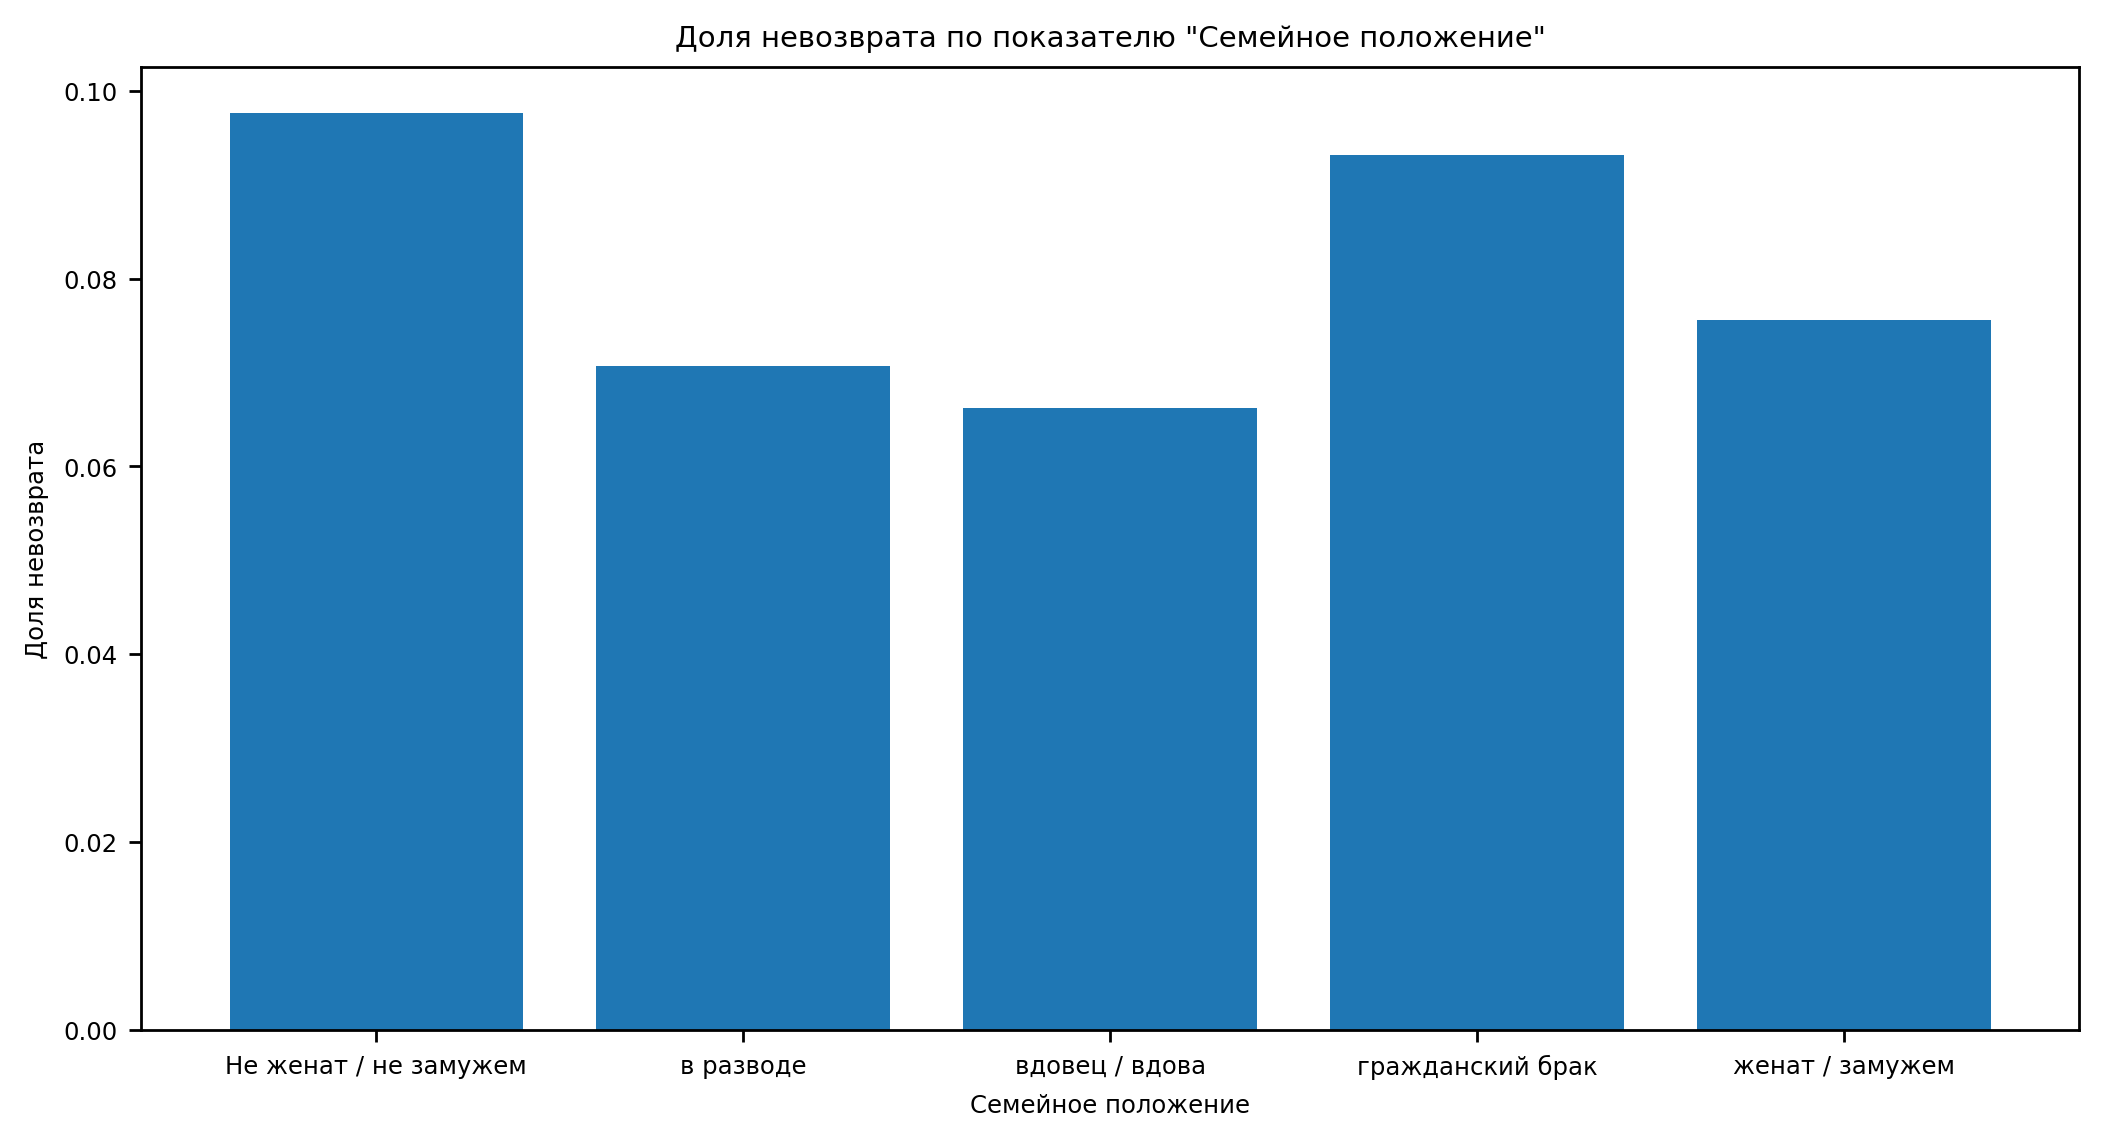

,Кол-во клиентов,Кол-во должников,Доля невозврата
years_category,,,
18-30,3699,403,0.108948
31-40,5773,548,0.094925
41-50,5225,400,0.076555
51-60,4516,280,0.062002
>61,2118,101,0.047686


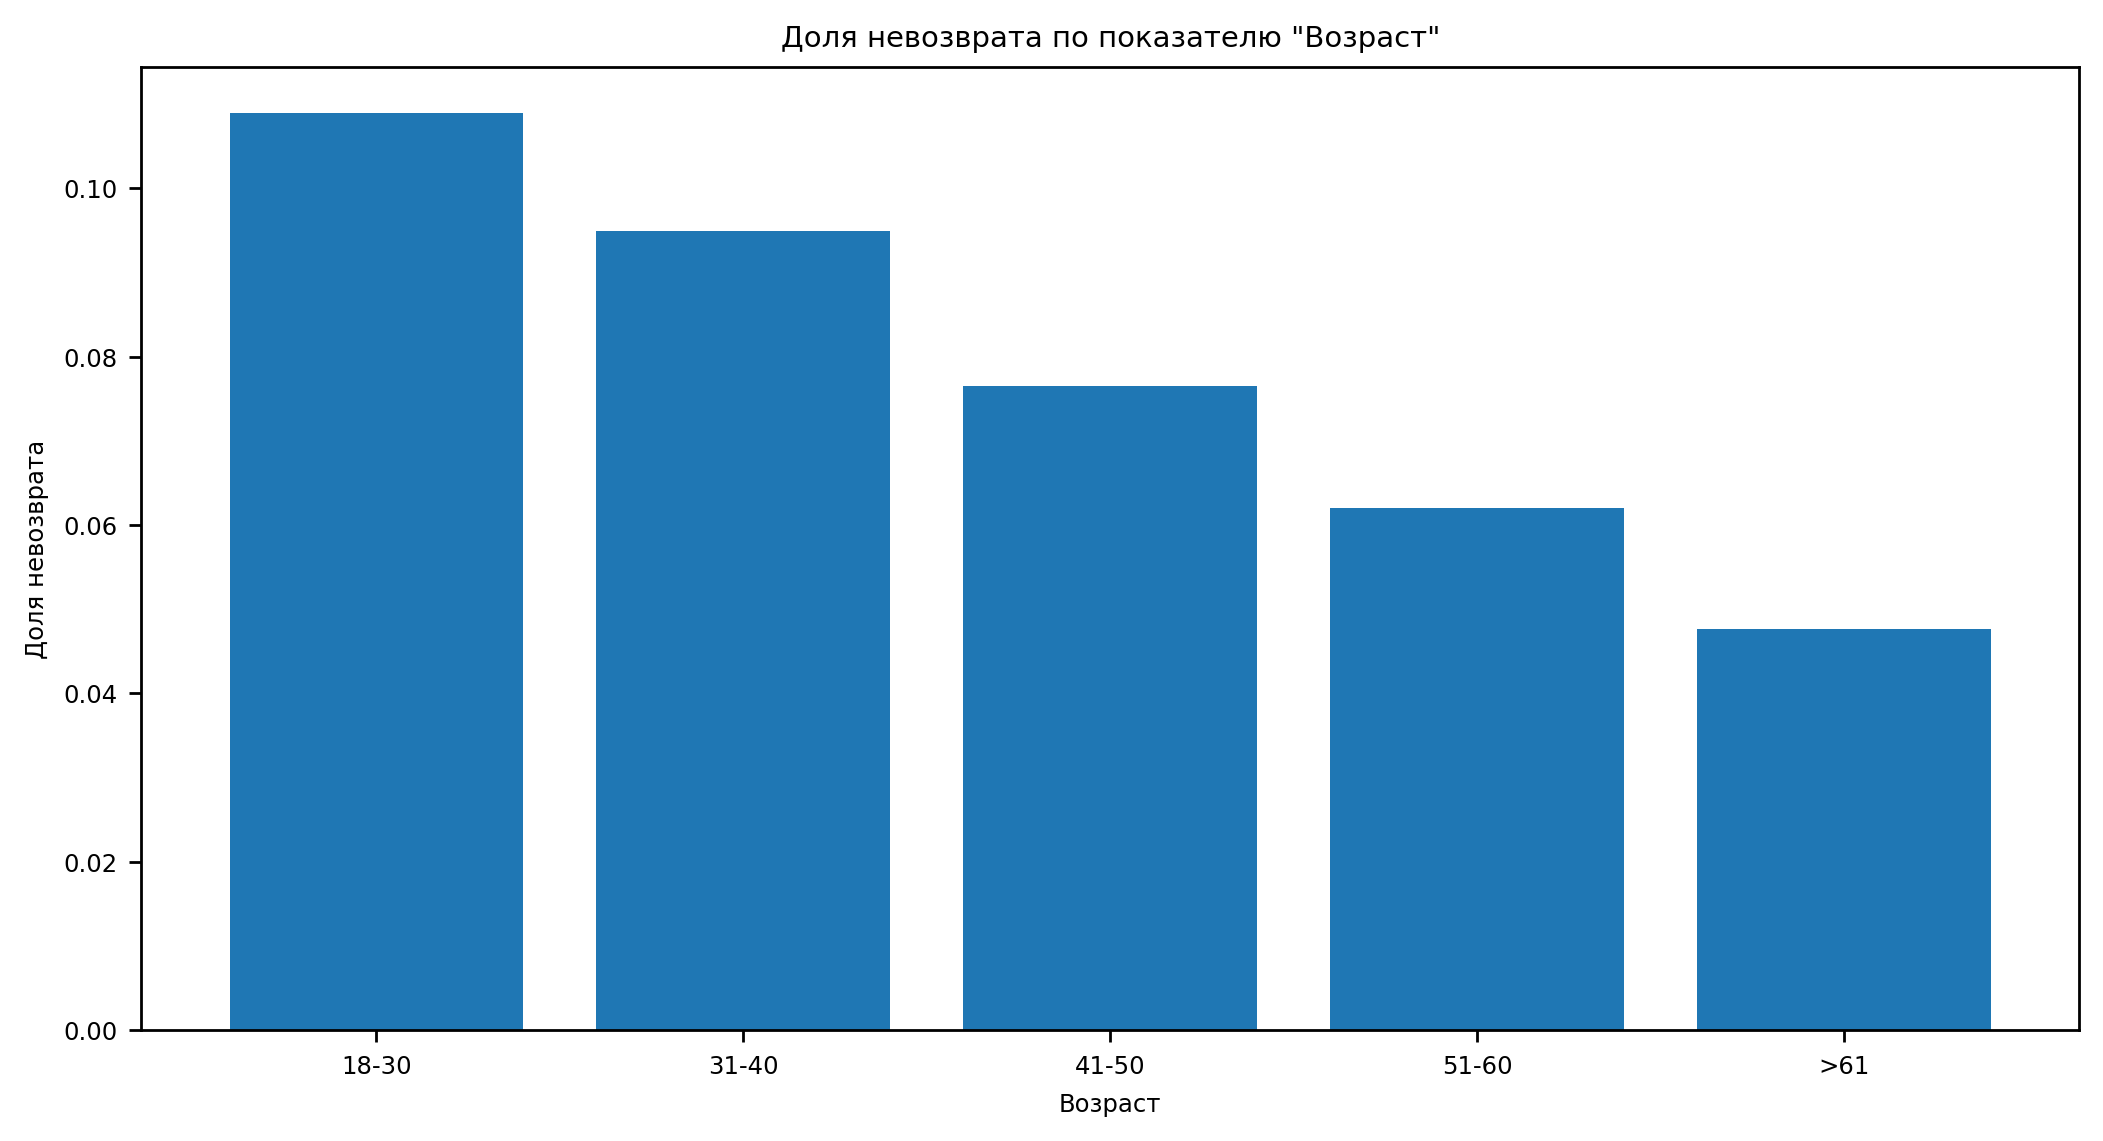

In [23]:
# Выведем долю невозврата по семейному положению.
data_pivot(data, 'family_status', 'Семейное положение')

# Для проверки гипотезы о влиянии возраста, отработаем позиции с нулевым возрастом,
# заменив их на медиану исходя из профессии.
for y in data['income_type'].unique():
    data.loc[(data['income_type'] == y) & (data['dob_years'] == 0), 'dob_years']= \
    data.loc[data['income_type'] == y, 'dob_years'].median()

# Введем категоризацию по возрасту.
# Установим нулевым значениям категорию "Ошибка!" чтобы удостовериться что нулевые значения устранены.
def categorize_years(years):
    try:
        if 0 >= years:
            return 'Ошибка!'
        elif 1 <= years <= 17:
            return '1-17'
        elif 18 <= years <= 30:
            return '18-30'
        elif 31 <= years <= 40:
            return '31-40'
        elif 41 <= years <= 50:
            return '41-50'
        elif 51 <= years <= 60:
            return '51-60'
        elif years >= 61:
            return '>61'
    except:
        pass
    
data['years_category'] = data['dob_years'].apply(categorize_years)

# Выведем долю невозврата по возрасту.  
data_pivot(data, 'years_category', 'Возраст')

**Вывод:**
  
Согласно данным, люди бывшие в браке или замужем/женаты, являются более надежными заемщиками чем одинокие люди.
  
Однако, по результатам дополнительного анализа данный по возрастным категориям можно заметить, что с увеличением возраста доля невозвратов снижается.  
Таким образом можно сделать вывод что в части наличия зависимости между семейным положением и возвратом кредита в срок существенное значение имеет возраст заемщика.

#### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

,Кол-во клиентов,Кол-во должников,Доля невозврата
total_income_category,,,
E,22,2,0.090909
C,15921,1353,0.084982
A,25,2,0.080000
B,5014,354,0.070602
D,349,21,0.060172


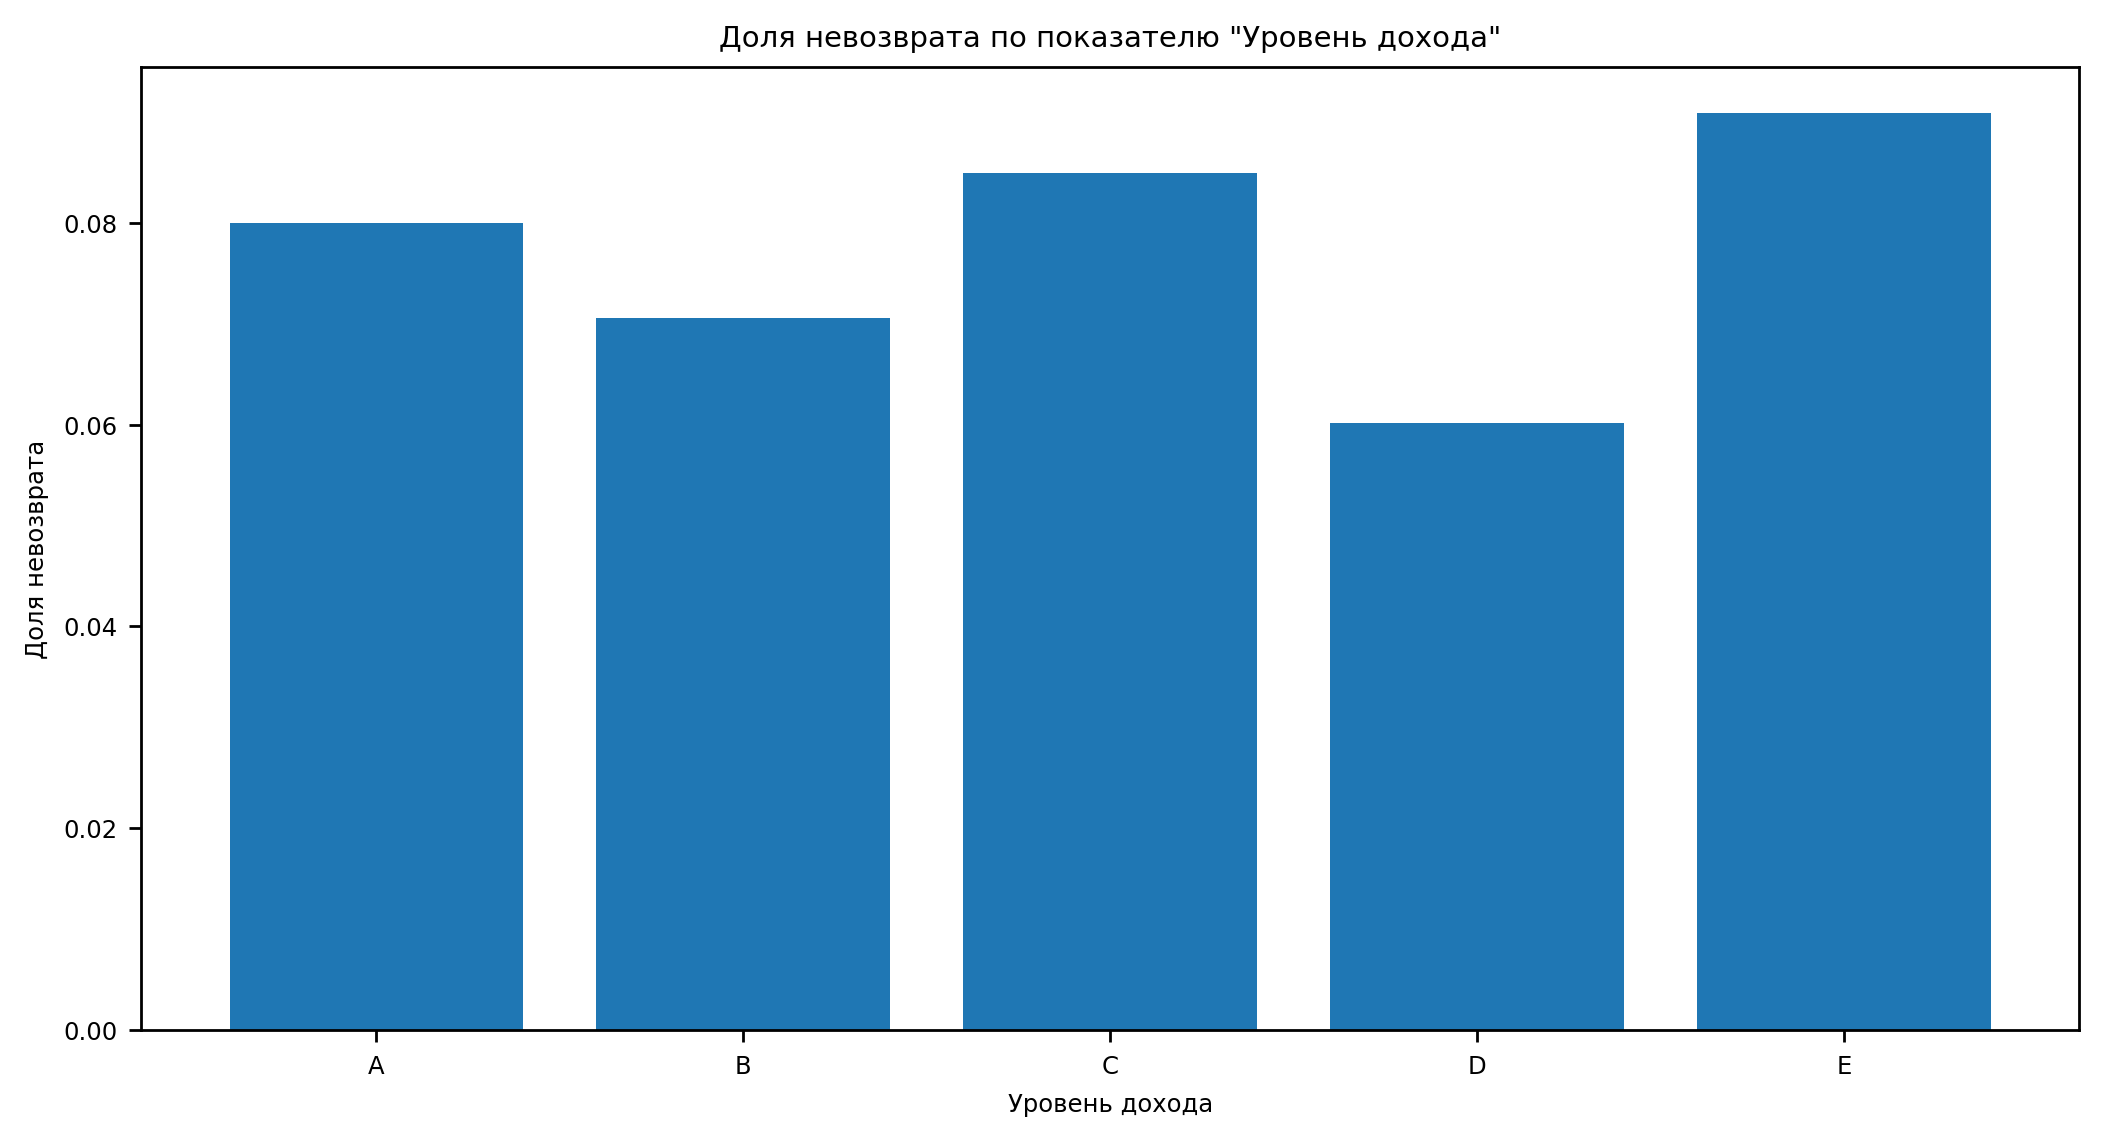

In [24]:
# Выведем долю невозврата по уровню дохода.
data_pivot(data, 'total_income_category', 'Уровень дохода')

**Вывод:**
  
Данные по распределению по категориям дохода показывает концентрацию людей в двух категориях, это 'B' - от 200 тыс. руб. до 1 млн. руб. и 'С'- от 50 тыс. руб. до 200 тыс. руб. При этом, доля невозврата у людей с меньшим доходом (50-200 тыс. руб.) выше чем у людей с доходом доходом от 200 тыс. руб. до 1 млн. руб., Что свидетельствует о наличии зависимости между уровнем дохода и возвратом кредита в срок.
Необходимо отметить что по остальным категориям данных выборки недостаточно для формирования корректных выводов.

#### Как разные цели кредита влияют на его возврат в срок?

,Кол-во клиентов,Кол-во должников,Доля невозврата
purpose_category,,,
операции с автомобилем,4279,400,0.093480
получение образования,3988,369,0.092528
проведение свадьбы,2313,183,0.079118
операции с недвижимостью,10751,780,0.072551


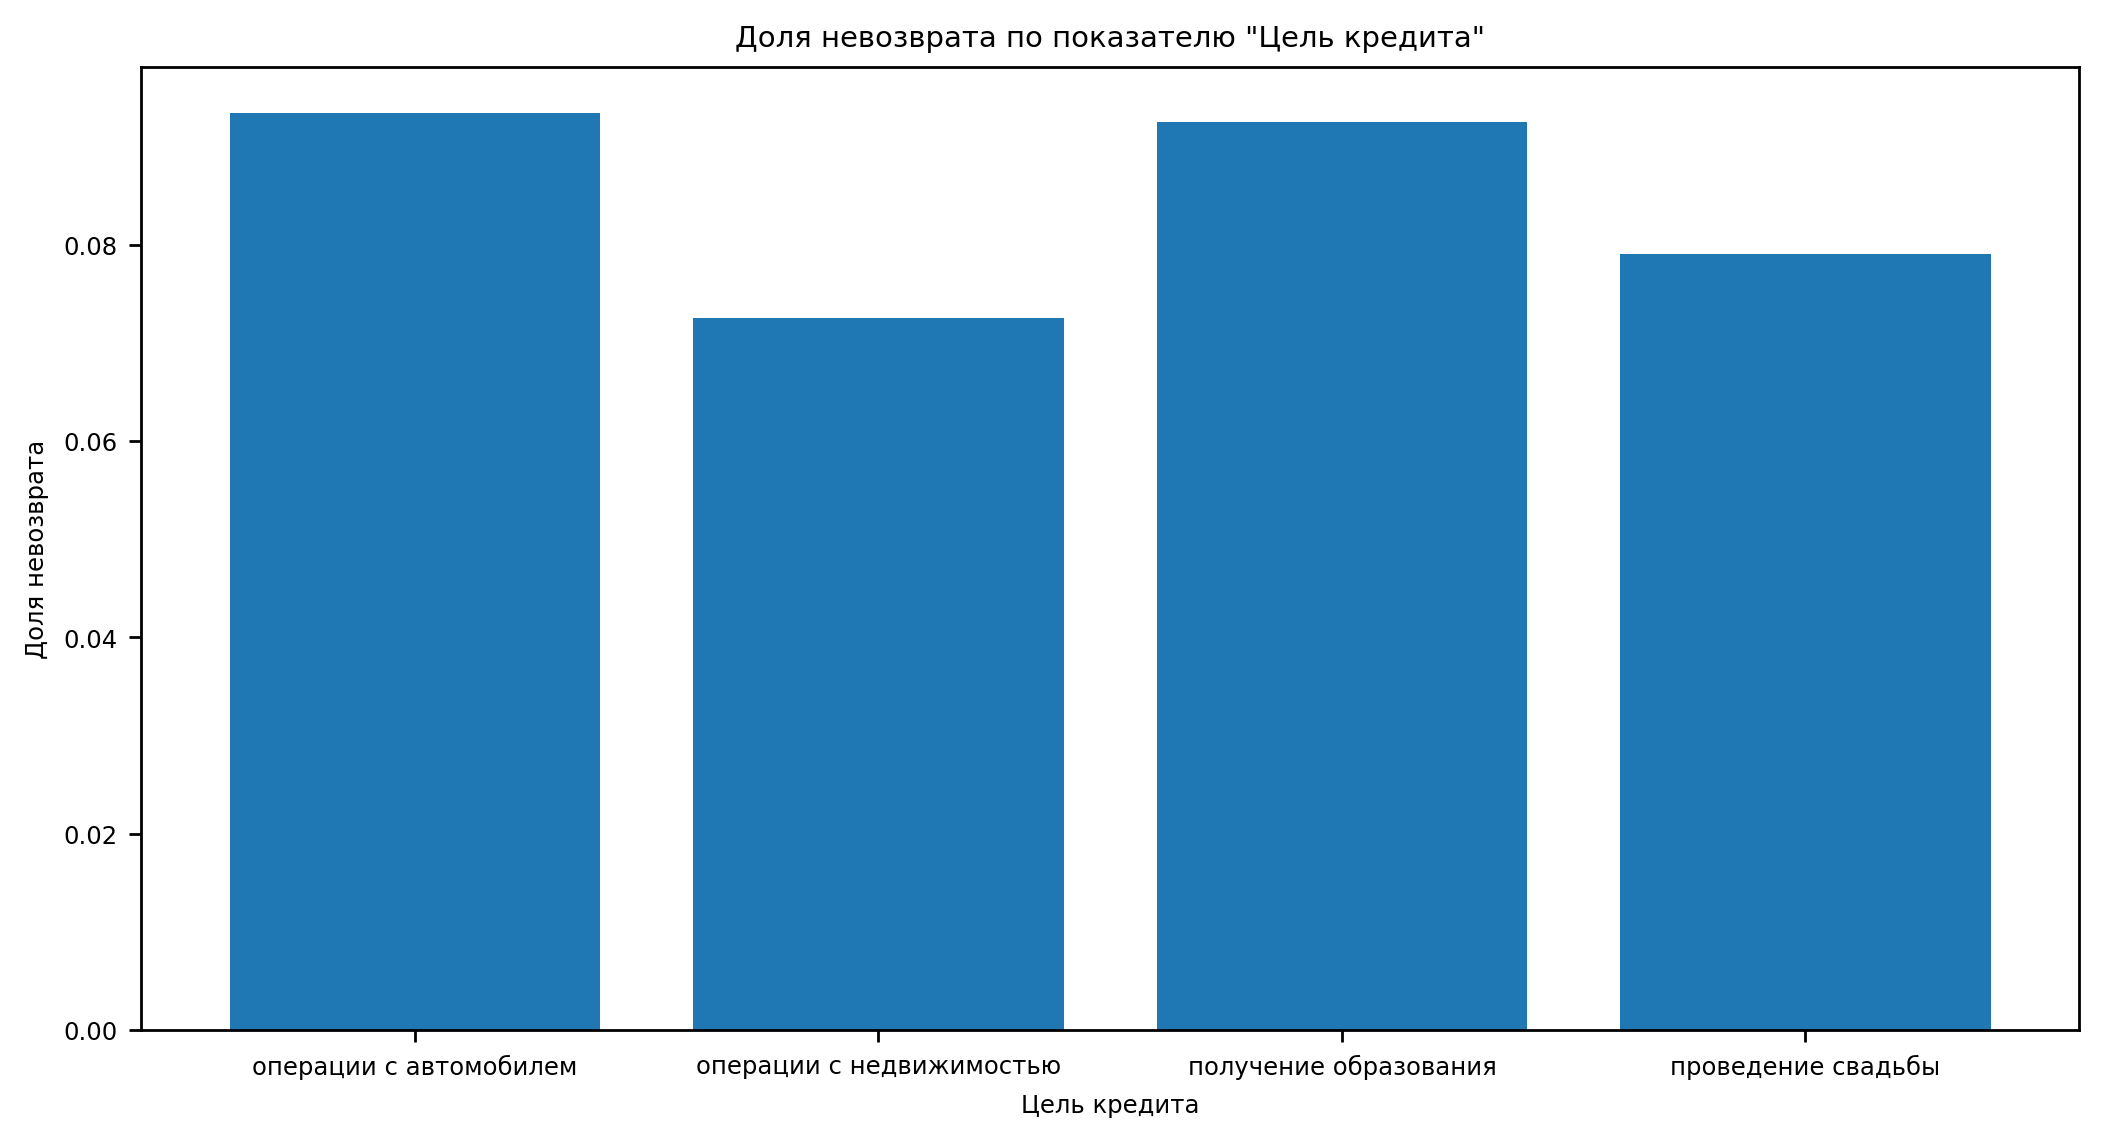

In [25]:
# Выведем долю невозврата по целям кредита.
data_pivot(data, 'purpose_category', 'Цель кредита')

**Вывод:**
  
По результатам анализа данных по категориям целей кредита, можно сделать вывод что 'операции с автомобилем' и 'получение образование' являются наиболее рискованными, в то время как операции с недвижимость наиболее надежная.
Согласно полученным выше аналитическим данным пропуски сосредоточены в двух столбцах: days_employed и total_income. Причинами пропусков может являться отсутствие данной информации, например в случае, если человекявляется безработным или не предоставил справку с места работы, и не указал данную информацию в анкете при получении кредита, открытии счета.
Помимо всего прочего нельзя исключать технический характер проблемы связанной с обработкой, хранением, записью и передачей информации на каком-то из этапов обработки или выгрузки данных.

### Общий вывод.

Для анализа представленного массива данных, по результатам обработки информации на предмет устранения дубликатов, пропусков и аномальных значений, мы категоризировали и сгруппировали данные для проверки следующих гипотез:
- наличие зависимости между количеством детей и возвратом кредита в срок;
- наличие зависимости между семейным положением и возвратом кредита в срок;
- наличие зависимости между уровнем дохода и возвратом кредита в срок;
- наличие зависимости между целями кредита и возвратом кредита в срок.

Для предотвращения искажения выводов, на этапе анализа данных, мы также учли распределение выборки по категориям и долю невозврата от общего числа людей в категории.

Согласно проведенному анализу можно отметить, что наиболее ответственные заемщики это люди без детей, в браке или бывшие в браке, возврастом старше 40 лет и с уровнем дохода от 200 тысяч до 1 млн. рублей, цель которых является операции с недвижимостью или проведение свадьбы.

Наиболее рискованными можно отметить операции с автомобилем и получением образования людьми до 30 лет и имеющие детей, и доходом до 200 тыс руб.

При этом необходимо отметить, что представленная выборка демонстрирует непропорциональное распределение людей по категориям, что может привести к искажению выводов, и, в последствии, привести к неверным решениям в отношении потенциальных заемщиков на основании данных скоринговой модели.

Для устранения пропусков, дубликатов и аномальных значений рекомендуется установить поля 'Количество отработанных дней' и 'Уровень дохода' в качестве обязательных к заполнению при подаче заявок или заполнении анкет. Также можно предусмотреть процедуру дедупликации для предотвращения дублирования значений и проверку на предмет корректности введенных значений, на этапе заполнения заявки, заполнения анкеты, или загрузки данных в систему. С учетом наличия нулевых значений в графе 'Возраст', рекомендуется также установить данное поле в качестве обязательного к заполнению с ограничение на ввод некорректных значений (не менее 18 лет).

Также может быть полезным расчет других метрик оценки кредитного рейтинга, например на основе отношения выплат к доходу, количество дней просрочки к сроку кредита, количество просроченных выплат к общему количеству выплат, количество кредитов с нарушением к общему количеству кредитов в кредитной истории и тд.

Рекомендуется провести дополнительный анализ расширенной диверсифицированной выборки, для получения информации по взаимосвязи уплаты кредита в срок с колиеством детей указанных категорий, и изменения состава категорий для анализа 
взаимосвязи уплаты кредита в срок и уровня дохода.